<a href="https://colab.research.google.com/github/riinndescartes/Machine-Learning/blob/main/Pt2_Praktikum_LogisticRegression_Catherine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Model Pertama

Import Library

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Memuat Dataset

In [ ]:
# Load the dataset
file_path = 'bank-additional-full.csv'
data = pd.read_csv(file_path, sep=';')  # The dataset likely uses ';' as a separator

# Display the first few rows of the data to inspect
data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Normalisasi Data

In [ ]:
# Mengubah variabel target 'y' menjadi numerik (yes = 1, no = 0)
data['y'] = data['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Mengubah variabel kategori menjadi numerik dengan one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

# Memisahkan fitur (X) dan target (y)
X = data_encoded.drop('y', axis=1)
y = data_encoded['y']

# Membagi data menjadi training set (80%) dan test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mengecek ukuran data training dan test
print(X_train.shape, X_test.shape)

(32950, 53) (8238, 53)


Membuat Model dan Prediksi

In [ ]:
from sklearn.linear_model import LogisticRegression

# Mendefinisikan model Logistic Regression
logreg = LogisticRegression(max_iter=1000)

# Melatih model dengan data training
logreg.fit(X_train, y_train)

# Membuat prediksi pada data test
y_pred = logreg.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluasi Model

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Membuat laporan klasifikasi
class_report = classification_report(y_test, y_pred)

# Menampilkan hasil
print("Akurasi:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Laporan Klasifikasi:\n", class_report)


Akurasi: 0.9098082058752124
Confusion Matrix:
 [[7097  206]
 [ 537  398]]
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.66      0.43      0.52       935

    accuracy                           0.91      8238
   macro avg       0.79      0.70      0.73      8238
weighted avg       0.90      0.91      0.90      8238



#Pertanyaan

**Soal 1**

a. Apa maksud dari warning di atas?

Error tersebut adalah `ConvergenceWarning` yang menunjukkan bahwa algoritma Logistic Regression dengan solver default lbfgs gagal mencapai konvergensi dalam jumlah iterasi yang ditentukan `(max_iter=1000)`. Artinya, model belum menemukan solusi optimal dalam jumlah iterasi yang diizinkan.

Dalam konteks **machine learning** dan **optimasi model**, **konvergensi** adalah kondisi ketika algoritma yang sedang dijalankan mencapai hasil yang stabil atau tidak berubah secara signifikan dengan iterasi tambahan. Dalam hal ini, konvergensi terjadi saat model, seperti **Logistic Regression**, menemukan nilai parameter atau koefisien yang meminimalkan error atau loss secara optimal.

Pada proses training, algoritma **Logistic Regression** (dan algoritma lainnya) bekerja dengan mengulang beberapa kali (iterasi) untuk memperbaiki parameter model secara bertahap agar prediksinya semakin akurat. Jika jumlah iterasi tercapai, namun error atau loss masih belum mencapai nilai minimal yang stabil, algoritma dianggap **tidak konvergen**. Dalam hal ini, model tidak mencapai solusi optimal dan perlu bantuan, seperti:

- **Penambahan jumlah iterasi** untuk memberikan waktu lebih banyak bagi algoritma mencapai stabilitas.
- **Standarisasi data** agar model lebih mudah "membaca" pola dalam data.
- **Menggunakan solver yang berbeda** yang mungkin lebih efisien dalam mencapai konvergensi untuk dataset tertentu.

Dengan kata lain, konvergensi adalah keadaan di mana perubahan dalam nilai parameter model dari satu iterasi ke iterasi berikutnya sangat kecil sehingga dianggap telah mencapai hasil terbaik yang mungkin.


b. Perbaiki code di atas agar tidak muncul warning di atas.

- Meningkatkan jumlah iterasi (max_iter): Karena jumlah iterasi default mungkin tidak cukup untuk model mencapai konvergensi, Anda dapat meningkatkan parameter max_iter. Contoh:

      logreg = LogisticRegression(max_iter=2000)

- Skalakan data (preprocessing):

  Logistic Regression sering kali bekerja lebih baik ketika data telah dinormalisasi atau distandarisasi. Kita bisa menggunakan `StandardScaler` atau `MinMaxScaler` dari `sklearn.preprocessing` untuk mengubah skala data.

      from sklearn.preprocessing import StandardScaler
      scaler = StandardScaler()
      X_train = scaler.fit_transform(X_train)
      X_test = scaler.transform(X_test)

- Mencoba solver lain:

  Solver lain seperti `saga atau `liblinear` mungkin lebih cocok untuk dataset tertentu, terutama jika dataset besar atau memiliki fitur yang tidak terstandarisasi dengan baik.

      logreg = LogisticRegression(solver='saga', max_iter=1000)

- Mengurangi kompleksitas model atau fitur:

  Jika dataset memiliki banyak fitur atau multikolinearitas, pertimbangkan untuk mengurangi dimensi data menggunakan metode seperti PCA (Principal Component Analysis) atau memilih fitur yang paling relevan.
  
- Cek untuk data outlier:

  Kadang-kadang, outlier atau nilai ekstrim pada fitur dapat mempengaruhi konvergensi model. Pastikan untuk memeriksa dan menangani outlier jika diperlukan.

💡 Penjelasan:
Agar data mencapai konvergensi paling optimal ternyata yang paling terbaik adalah dengan menggunakan Standar Scaler, Make Pipeline dan iterasi pada solbernya tetap 1000.

**Soal 2**

Buatkan analisa dari hasil di atas.

💡 Penjelasan:

Saya membuatkan grafis dari Confussion Matrix untuk mengetahui posisi TP, FP, TN dan FN.

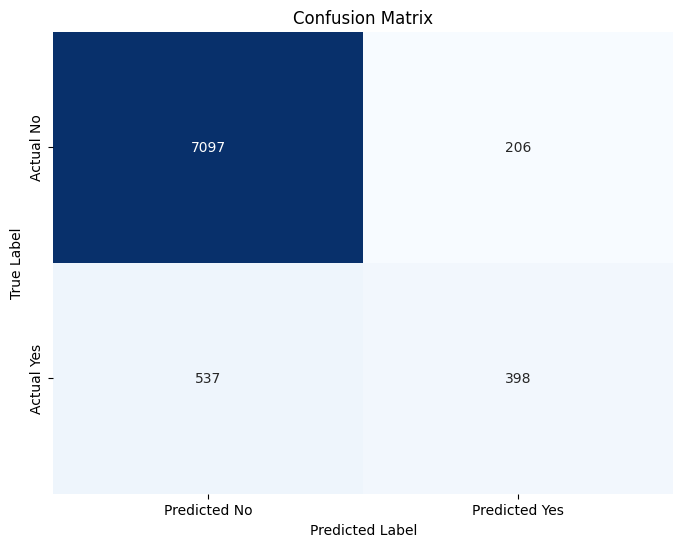

In [ ]:
# Menampilkan confusion matrix sebagai gambar
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

💡 Penjelasan:
1. **Akurasi Model**
   - **Akurasi**: 0.91 (atau 91%) menunjukkan bahwa model ini secara keseluruhan cukup baik dalam memprediksi hasil dengan benar. Artinya, sekitar 91% dari prediksi model sesuai dengan nilai aktual dalam data uji.

2. **Confusion Matrix Analysis**
   - **True Negatives (TN)**: 7097 data- Model memprediksi "No" dan benar-benar "No" dalam data aktual.
   - **False Positives (FP)**: 206 data- Model memprediksi "Yes" padahal data aktual adalah "No" (kesalahan jenis I).
   - **False Negatives (FN)**: 537 data- Model memprediksi "No" padahal data aktual adalah "Yes" (kesalahan jenis II).
   - **True Positives (TP)**: 398 data- Model memprediksi "Yes" dan benar-benar "Yes" dalam data aktual.

3. **Precision, Recall, dan F1-Score**
   - **Precision untuk kelas 0 (No)**: 0.93. Artinya, 93% dari prediksi "No" oleh model memang benar "No" dalam data aktual.
   - **Recall untuk kelas 0 (No)**: 0.97. Artinya, model berhasil mendeteksi 97% dari semua data aktual "No".
   - **F1-Score untuk kelas 0 (No)**: 0.95. Nilai ini menunjukkan keseimbangan antara precision dan recall untuk kelas "No", yang cukup tinggi.

   - **Precision untuk kelas 1 (Yes)**: 0.66. Artinya, 66% dari prediksi "Yes" oleh model memang benar "Yes" dalam data aktual.
   - **Recall untuk kelas 1 (Yes)**: 0.43. Artinya, model hanya berhasil mendeteksi 43% dari semua data aktual "Yes", yang menunjukkan bahwa banyak nilai "Yes" yang salah diprediksi sebagai "No".
   - **F1-Score untuk kelas 1 (Yes)**: 0.52. Ini menunjukkan bahwa model kurang efektif dalam mendeteksi kelas "Yes" dibandingkan kelas "No".

4. **Macro Average dan Weighted Average**
   - **Macro Average**: Nilai rata-rata precision, recall, dan F1-score dari kedua kelas tanpa memperhatikan proporsi setiap kelas. Macro average menunjukkan bahwa model ini memiliki rata-rata F1-score 0.73, yang berarti model lebih kuat dalam memprediksi kelas mayoritas (kelas 0) dibandingkan kelas minoritas (kelas 1).
   - **Weighted Average**: Rata-rata yang memperhitungkan jumlah contoh dalam setiap kelas. Weighted average mendekati performa keseluruhan untuk akurasi dan F1-score, yang sebagian besar dipengaruhi oleh kelas mayoritas.


Model ini bekerja sangat baik untuk memprediksi kelas "No" (kelas mayoritas) tetapi kesulitan dalam mendeteksi kelas "Yes" (kelas minoritas). Ini tercermin dari rendahnya nilai recall dan F1-score pada kelas 1. Langkah perbaikan:

-  **Resampling Data**: Kita bisa mencoba metode oversampling (seperti SMOTE) pada kelas minoritas atau undersampling pada kelas mayoritas untuk menangani ketidakseimbangan data.

- **Penggunaan Algoritma Lain**: Beberapa algoritma seperti Random Forest atau Gradient Boosting dapat lebih efektif dalam mendeteksi kelas minoritas.

- **Feature Scaling**: Pastikan data telah di-scale (misalnya dengan StandardScaler) karena Logistic Regression sensitif terhadap perbedaan skala antar fitur.

- **Tuning Hyperparameter**: Eksplorasi parameter lain seperti `C` atau `solver` di model Logistic Regression untuk meningkatkan konvergensi dan performa.

Secara keseluruhan, model ini memiliki performa baik, tetapi akan lebih efektif jika dilakukan penyesuaian untuk mengatasi ketidakseimbangan kelas.

**Soal 3**

buatlah data test dari dataset yang digunakan kemudian ujikan ke model yang telat dibuat.

💡 Penjelasan:

Memisahkan data test dari dataset asalnya saya menggunakan `numpy` yaitu pemilihan data secara acak yaitu `np.random.choice()`.

**Soal 4**

Lakukan beberapa eksperimen berikut:
1. Feature Scaling
2. Penyeimbangan Data \
    Dalam dataset ini, kelas 0 (tidak berlangganan) jauh lebih banyak daripada kelas 1 (berlangganan). Ketidakseimbangan kelas bisa membuat model lebih cenderung memprediksi kelas mayoritas. Anda bisa mengatasi ini dengan menyesuaikan **class weight**

💡 Penjelasan:
1. Feature Scaling yang digunakan adalah `StandarScaler` dan metode `make_pipeline` dari library `Sklearn` pada tahap **membuat model regresi logistik**.

2. Penyeimbangan data dilakukan karena kelas 0 ('no') menjadi mayoritas dalam dataset sedangkan kelas 1 ('yes') cenderung lebih sedikit. Maka hal tersebut berpotensi menyebabkan model mengalami overfitting atau hanya berkinerja sangat baik untuk mendeteksi salah satu kelas saja, yang merupakan mayoritas dalam kasus ini adalah kelas 0, sedangkan untuk mendeteksi kelas 1 sangat buruk. Sebelum overfitting ini terjadi maka langkah terbaiknya adalah melakukan `Undersampling` pada data kelas 0. Undersampling ini dilakukan pada tahap **data preprocessing**. Didapatkan hasil yaitu jumlah data test adalah sebanyak (7424, 53) dan data train sebanyak (1856, 53).

#Model Kedua dengan Perbaikan

###Persiapan Data

Mengimpor library, memuat dataset, inspeksi informasi data, menghitung data null dan menghitung Statistik Deskriptif dataset.

Import Library

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Memuat Dataset

In [4]:
# Load the dataset
file_path = 'bank-additional-full.csv'
data = pd.read_csv(file_path, sep=';', on_bad_lines= 'skip')  # The dataset likely uses ';' as a separator

# Display the first few rows of the data to inspect
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


💡 Penjelasan:

Setelah dipastikan tidak ada fitur yang mengandung data null maka tidak perlu dibersihkan lagi datasetnya dari data null.

In [7]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Data Preprocessing


One Hot Encoding Dataset, Undersampling, Split Dataset serta Mengetahui Ukuran Data Training dan Test.

In [8]:
# Mengubah variabel target 'y' menjadi numerik (yes = 1, no = 0)
data['y'] = data['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Mengubah variabel kategori menjadi numerik dengan one-hot encoding
data_encoded = pd.get_dummies(data, drop_first=True)

# Memisahkan fitur (X) dan target (y)
X = data_encoded.drop('y', axis=1)
y = data_encoded['y']

#Undersampling data mayoritas (0)
from imblearn.under_sampling import RandomUnderSampler

# Buat objek RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42, sampling_strategy= "auto")

#Lakukan undersampling pada data
x_resampled, y_resampled = undersampler.fit_resample(X, y)

# Membagi data menjadi training set (80%) dan test set (20%)
X_train, X_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

# Mengecek ukuran data training dan test
print(X_train.shape, X_test.shape)

(7424, 53) (1856, 53)


###Membuat Model dan Prediksi

Make Pipeline, Standar Scaler, Pemodelan Regresi Logistik dan Prediksi.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Mendefinisikan model Logistic Regression
logreg1 = LogisticRegression(max_iter=1000)

# Melatih model dengan data training
logreg1.fit(X_train, y_train)

# Membuat prediksi pada data test
y_pred = logreg1.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.linear_model import LogisticRegression

# Mendefinisikan model Logistic Regression
logreg2 = LogisticRegression(solver='saga', max_iter=1000)

# Melatih model dengan data training
logreg2.fit(X_train, y_train)

# Membuat prediksi pada data test
y_pred = logreg2.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Mendefinisikan model Logistic Regression
logreg3 = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Melatih model dengan data training
logreg3.fit(X_train, y_train)

# Membuat prediksi pada data test
y_pred = logreg3.predict(X_test)


💡 Penjelasan:

Pada baris kode yang menggunakan `Make Pipeline` dan `StandarScaler` sudah tidak terdapat error lagi dan hal itu mengindikasikan bahwa model telah mencapai titik konvergennya.
Ini adalah perbaikan paling optimal untuk model ini.

### Evaluasi Model

Confusion Matrix, Accuracy Score, Class Report dan Visualisasi Confusion Matrix.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Membuat laporan klasifikasi
class_report = classification_report(y_test, y_pred)

# Menampilkan hasil
print("Akurasi:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Laporan Klasifikasi:\n", class_report)

Akurasi: 0.8739224137931034
Confusion Matrix:
 [[787 127]
 [107 835]]
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       914
           1       0.87      0.89      0.88       942

    accuracy                           0.87      1856
   macro avg       0.87      0.87      0.87      1856
weighted avg       0.87      0.87      0.87      1856



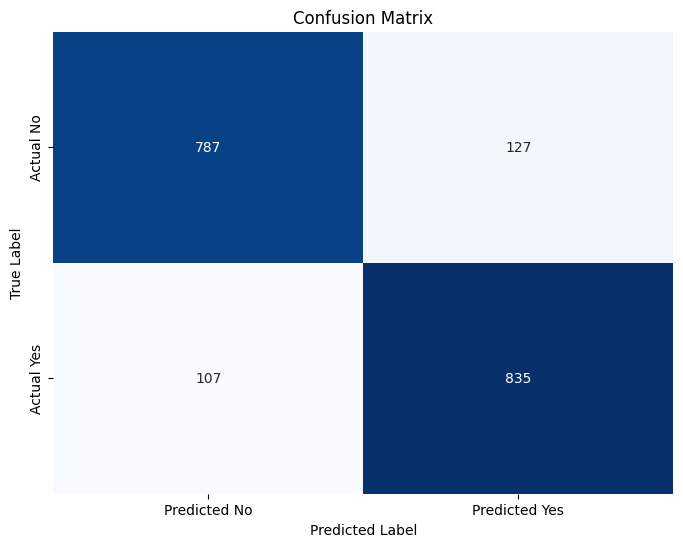

In [ ]:
# Menampilkan confusion matrix sebagai gambar
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

💡 Interpretasi Hasil Model Kedua dengan Perbaikan

1. **Akurasi Model**  
   Model memiliki akurasi sebesar **0,8739** atau sekitar **87,4%**, yang berarti dari seluruh prediksi yang dibuat (sebanyak 1856 sampel), sekitar 87,4% dari prediksi tersebut benar. Akurasi ini menunjukkan seberapa baik model dalam mengklasifikasikan kelas dengan benar dibandingkan dengan keseluruhan data.

2. **Confusion Matrix**  
   Confusion Matrix menggambarkan hasil prediksi untuk masing-masing kelas, yaitu:
   - **True Negative (787)**: Model memprediksi kelas 0 dengan benar sebanyak 787 kali.
   - **False Positive (127)**: Model memprediksi kelas 1 padahal seharusnya kelas 0 sebanyak 127 kali.
   - **False Negative (107)**: Model memprediksi kelas 0 padahal seharusnya kelas 1 sebanyak 107 kali.
   - **True Positive (835)**: Model memprediksi kelas 1 dengan benar sebanyak 835 kali.
   
   Dari matriks ini, kita bisa melihat bahwa model memiliki **107 kesalahan False Negative** dan **127 kesalahan False Positive**, yang berarti ada sejumlah data yang salah diklasifikasikan. Untuk interpretasi bisnis atau implikasi lebih lanjut, False Positive dan False Negative bisa memiliki dampak berbeda tergantung pada konteks aplikasi model ini.

3. **Laporan Klasifikasi**  
   Laporan klasifikasi menunjukkan metrik evaluasi seperti **precision**, **recall**, dan **f1-score** untuk masing-masing kelas.

   - **Kelas 0**  
     - *Precision (0,88)*: Dari seluruh prediksi yang diklasifikasikan sebagai kelas 0, 88% adalah benar. Tingginya precision menunjukkan bahwa ketika model memprediksi kelas 0, ia cukup yakin dan jarang salah.
     - *Recall (0,86)*: Dari seluruh data sebenarnya yang termasuk kelas 0, model mampu menangkapnya dengan benar sebanyak 86%. Artinya, masih ada sekitar 14% data kelas 0 yang tidak terdeteksi oleh model (False Negative).
     - *F1-Score (0,87)*: F1-score mengombinasikan precision dan recall. Nilai F1 sebesar 0,87 menunjukkan keseimbangan antara kemampuan model mendeteksi kelas 0 dan akurasi dari prediksi kelas tersebut.
   
   - **Kelas 1**  
     - *Precision (0,87)*: Dari seluruh prediksi kelas 1, 87% adalah benar, yang menunjukkan model cukup andal dalam mengidentifikasi data yang seharusnya diklasifikasikan ke dalam kelas 1.
     - *Recall (0,89)*: Dari seluruh data yang sebenarnya kelas 1, model berhasil menangkapnya dengan benar sebesar 89%. Recall ini menunjukkan kemampuan model dalam mengidentifikasi mayoritas sampel kelas 1 secara efektif.
     - *F1-Score (0,88)*: Kombinasi precision dan recall untuk kelas 1 menghasilkan F1-score sebesar 0,88, yang menandakan model cukup optimal dalam mengenali kelas 1 dengan akurasi tinggi dan mampu meminimalkan kesalahan.

4. **Macro dan Weighted Average**  
   - **Macro Average (0,87)**: Nilai rata-rata dari precision, recall, dan F1-score untuk kedua kelas. Macro average memberikan gambaran kinerja model secara umum tanpa mempertimbangkan ketidakseimbangan kelas.
   - **Weighted Average (0,87)**: Nilai rata-rata tertimbang dari precision, recall, dan F1-score berdasarkan jumlah sampel pada masing-masing kelas. Karena jumlah data di kelas 0 dan kelas 1 hampir seimbang, weighted average mirip dengan macro average.

**💡 Implikasi Hasil:**
1. **Keandalan Model**  
   Dengan akurasi 87,4%, model ini cukup dapat diandalkan untuk klasifikasi, tetapi untuk aplikasi yang membutuhkan presisi atau deteksi yang sangat tinggi, mungkin perlu perbaikan.

2. **Penanganan False Negative dan False Positive**  
   Jika konsekuensi dari False Negative atau False Positive cukup besar dalam konteks aplikasi, perlu dilakukan perbaikan model atau penyesuaian threshold agar lebih menekan kesalahan ini.

3. **Penggunaan dalam Konteks Nyata**  
   Model ini cenderung lebih baik dalam mendeteksi kelas 1 (dengan recall 89%) daripada kelas 0 (recall 86%). Jika kelas 1 adalah kategori penting untuk diidentifikasi, model ini sudah menunjukkan kinerja baik. Namun, jika kebutuhan utama adalah menekan kesalahan pada kelas 0, maka perlu dilakukan penyesuaian agar model lebih akurat untuk kelas tersebut.

###Pengujian Model dengan Data Testing

Random Choice untuk menentukan ukuran data test yang dibuat atau diambil baru secara acak dari dataset sebelumnya, Prediksi, Akurasi Kinerja Model Baru (Accuracy Score, Confusion Matrix dan Report Classification).

In [ ]:
#Mengambil secara random dataset test sebanyak 300 data.
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

random_dataset = np.random.choice(X_test.index, size=300, replace=False)
X_test_random = X_test.loc[random_dataset]
y_test_random = y_test.loc[random_dataset]


#Masuk ke prediksi
y_pred_random = logreg3.predict(X_test_random)

#Akurasi kinerja model baru
akurasi_model_test = accuracy_score(y_test_random, y_pred_random)
print("Akurasi Model dengan Data Testing:", akurasi_model_test)

confusion_matrix_random = confusion_matrix(y_test_random, y_pred_random)
print("Confusion Matrix:\n", confusion_matrix)

classification_report_random = classification_report(y_test_random, y_pred_random)
print("Report Classification:\n", classification_report_random)

Akurasi Model dengan Data Testing: 0.8966666666666666
Confusion Matrix:
 <function confusion_matrix at 0x7970feb41e10>
Report Classification:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       148
           1       0.90      0.89      0.90       152

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



💡 Penjelasan:

Data test yang didapatkan secara acak menghasilkan Accuracy Score sebesar 90% lalu skor untuk precision, recall dan F1 Score dari kedua kelas yaitu kelas 1 dan 0 terlihat tidak terlalu jauh satu sama lain dan skornya sama-sama besar untuk ukuran kriteria kinerja model regresi logistik yaitu berkisar pada angka 89% s.d. 90%. Model menunjukkan kinerja yang baik dalam mengenali kedua kelas tanpa ketimpangan dampak dari oversampling salah satu kelasnya seperti yang terjadi pada model sebelumnya sebelum perbaikan dengan Undersampling dan Standar Scaler.